# Анализ рынка вакансий в направлении Data Science

### Описание проекта: 

**Цель проекта**: Исследование рынка вакансий в области Data Science для выявления ключевых тенденций, востребованных навыков и факторов, влияющих на зарплатные ожидания.  

**Используемые инструменты**:  
- Python (Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn)  
- Jupyter Notebook (`vacancy_analysis.ipynb`)  

---

### **Основные этапы анализа**  

#### **1. Предобработка данных**  
- **Заполнение пропусков**: Обработка отсутствующих значений в данных (например, зарплаты, опыт работы).  
- **Приведение типов данных**: Корректное преобразование столбцов (даты, числовые и категориальные признаки).  
- **Кодирование категориальных признаков**: Преобразование текстовых данных (например, специализации, города) в числовой формат для анализа.  

#### **2. Разведочный анализ (EDA)**  
- **Распределение зарплат по специализациям**: Сравнение уровня доходов в разных направлениях (Data Scientist, Аналитик данных, Machine Learning Engineer).  
- **Анализ требуемого опыта**: Исследование, как опыт работы влияет на предлагаемую зарплату.  
- **География вакансий**: Определение городов и стран с наибольшим количеством вакансий в DS.  

#### **3. Анализ навыков**  
- **Топ-20 востребованных навыков**: Выявление наиболее часто встречающихся требований (Python, SQL, ML и т. д.).  
- **Сравнение навыков между специализациями**: Различия в требованиях для разных ролей. 

#### **4. Корреляционный анализ**  
- **Матрица корреляций**: Поиск взаимосвязей между параметрами (зарплата, опыт, локация).  
- **Зависимости между параметрами**: Анализ, какие факторы сильнее всего влияют на уровень зарплат.  

#### **5. Визуализация**  
- Построение графиков (столбчатые диаграммы, boxplot, heatmap, scatter plot) для наглядного представления данных.  


In [5]:
# Загрузка необходимых библиотек

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Загрузка данных**  

В рамках анализа рынка вакансий в сфере Data Science мы загрузим датасет, содержащий информацию о вакансиях, собранных **31 марта 2025 года**. Данные будут включать ключевые параметры: названия вакансий, компании, уровень зарплат, требуемый опыт, локации и другие важные характеристики.  

---

### **Описание столбцов датасета**  

| Название столбца              | Описание |  
|-------------------------------|----------|  
| **ID вакансии**               | Содержит уникальный идентификатор вакансии |  
| **Название**                  | Указывает название вакансии |  
| **Компания**                  | Отражает наименование компании-работодателя |  
| **Зарплата (от)**             | Показывает нижнюю границу зарплатного диапазона |  
| **Зарплата (до)**             | Показывает верхнюю границу зарплатного диапазона |  
| **Валюта**                    | Указывать валюту зарплаты |  
| **Город**                     | Содержит город размещения вакансии |  
| **Опыт**                      | Отражает требуемый опыт работы |  
| **Тип занятости**             | Указывает формат работы |  
| **Дата публикации**           | Показывает дату размещения вакансии |  
| **Ссылка**                    | Содержит URL вакансии на hh.ru |  
| **Время обработки страницы**  | Отражает техническое время обработки вакансии парсером |  
| **Ключевые навыки**           | Включает список требуемых навыков (Python, SQL, ML и др.) |  
| **Описание**                  | Содержит текст с подробным описанием вакансии |  
| **Запрос**                    | Указывает поисковый запрос, по которому найдена вакансия |  
| **Время начала сбора**        | Отражает временную метку начала сбора данных |  
| **Время окончания сбора**     | Показывает временную метку завершения сбора данных |  


In [9]:
data = pd.read_csv('hh_vacancies_20250331_2040.csv')
data.head()

,ID вакансии,Название,Компания,Зарплата (от),Зарплата (до),Валюта,Город,Опыт,Тип занятости,Дата публикации,Ссылка,Время обработки страницы,Ключевые навыки,Описание,Запрос,Время начала сбора,Время окончания сбора
0,118987277,Frontend-разработчик,АстраЗенека,NaN,NaN,NaN,Москва,От 3 до 6 лет,Полная занятость,2025-03-31T17:01:03+0300,https://hh.ru/vacancy/118987277,6.26 сек,"React, VueJS, HTML",<p>Компания «АстраЗенека» верит в потенциал св...,data science,2025-03-31 20:37:47,2025-03-31 20:39:11
1,118965013,Java developer (middle),JSA Group,NaN,NaN,NaN,Москва,От 1 года до 3 лет,Полная занятость,2025-03-31T11:29:58+0300,https://hh.ru/vacancy/118965013,6.26 сек,"Java, Spring Security, Spring WebFlux, SQL, Sp...",<p><strong>JSA Group</strong> - аккредитованна...,data science,2025-03-31 20:37:47,2025-03-31 20:39:11
2,118951697,Аналитик данных,Петрович-Тех,NaN,NaN,NaN,Санкт-Петербург,От 1 года до 3 лет,Полная занятость,2025-03-31T08:49:56+0300,https://hh.ru/vacancy/118951697,6.26 сек,NaN,<p><strong>«Петрович-Тех» </strong>строит и ра...,data science,2025-03-31 20:37:47,2025-03-31 20:39:11
3,118909743,Директор департамента закупочной деятельности,Российское общество Знание,NaN,NaN,NaN,Москва,Более 6 лет,Полная занятость,2025-03-28T15:56:11+0300,https://hh.ru/vacancy/118909743,6.26 сек,"Управление закупками, Управление бизнес процес...",<p><strong>Российское общество «Знание»</stron...,data science,2025-03-31 20:37:47,2025-03-31 20:39:11
4,118972548,Аналитик данных (проект Честный знак),Coleman Group,150000.0,NaN,RUR,Москва,От 1 года до 3 лет,Полная занятость,2025-03-31T13:11:48+0300,https://hh.ru/vacancy/118972548,6.26 сек,NaN,<p>В аккредитованную ИТ компанию «Коулмэн Тех»...,data science,2025-03-31 20:37:47,2025-03-31 20:39:11


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID вакансии               1127 non-null   int64  
 1   Название                  1127 non-null   object 
 2   Компания                  1127 non-null   object 
 3   Зарплата (от)             319 non-null    float64
 4   Зарплата (до)             218 non-null    float64
 5   Валюта                    375 non-null    object 
 6   Город                     1127 non-null   object 
 7   Опыт                      1127 non-null   object 
 8   Тип занятости             1127 non-null   object 
 9   Дата публикации           1127 non-null   object 
 10  Ссылка                    1127 non-null   object 
 11  Время обработки страницы  1127 non-null   object 
 12  Ключевые навыки           688 non-null    object 
 13  Описание                  1115 non-null   object 
 14  Запрос  

In [13]:
data.describe()

,ID вакансии,Зарплата (от),Зарплата (до)
count,1.127000e+03,3.190000e+02,218.000000
mean,1.178221e+08,1.380335e+05,166010.555046
std,3.010147e+06,1.352712e+05,121999.154080
min,8.185730e+07,1.200000e+03,700.000000
25%,1.180413e+08,7.000000e+04,70000.000000
50%,1.185256e+08,1.000000e+05,150000.000000
75%,1.188467e+08,1.500000e+05,247500.000000
max,1.189919e+08,1.400000e+06,650000.000000


### **Промежуточный вывод**  

После загрузки данных необходимо провести предварительную очистку:  

1. **Удалить ненужные столбцы**:  
   - `ID вакансий` — уникальный идентификатор не несёт полезной информации для анализа.  
   - `Время обработки страницы`, `Время начала сбора`, `Время окончания сбора` — технические метаданные, не влияющие на анализ вакансий.  
2. **Переименовать столбцы** для удобства работы:  
   - Привести названия к единому стилю.  


## **Предобработка данных**  

Перед анализом выполним очистку и преобразование данных:  

1. **Удалим** технические столбцы (ID, метаданные парсинга); 
2. **Переименуем** столбцы в удобный формат;   
3. **Визуализируем** распределения;  
4. **Обработаем** пропуски и аномалии;  
5. **Нормализуем** данные;  

Это подготовит данные для дальнейшего анализа трендов и зависимостей.

In [17]:
columns_to_drop = [
    'ID вакансии',          
    'Время обработки страницы',  
    'Время начала сбора', 
    'Время окончания сбора'
]

In [19]:
data = data.drop(columns=columns_to_drop, errors='ignore')

In [21]:
data.head()

,Название,Компания,Зарплата (от),Зарплата (до),Валюта,Город,Опыт,Тип занятости,Дата публикации,Ссылка,Ключевые навыки,Описание,Запрос
0,Frontend-разработчик,АстраЗенека,NaN,NaN,NaN,Москва,От 3 до 6 лет,Полная занятость,2025-03-31T17:01:03+0300,https://hh.ru/vacancy/118987277,"React, VueJS, HTML",<p>Компания «АстраЗенека» верит в потенциал св...,data science
1,Java developer (middle),JSA Group,NaN,NaN,NaN,Москва,От 1 года до 3 лет,Полная занятость,2025-03-31T11:29:58+0300,https://hh.ru/vacancy/118965013,"Java, Spring Security, Spring WebFlux, SQL, Sp...",<p><strong>JSA Group</strong> - аккредитованна...,data science
2,Аналитик данных,Петрович-Тех,NaN,NaN,NaN,Санкт-Петербург,От 1 года до 3 лет,Полная занятость,2025-03-31T08:49:56+0300,https://hh.ru/vacancy/118951697,NaN,<p><strong>«Петрович-Тех» </strong>строит и ра...,data science
3,Директор департамента закупочной деятельности,Российское общество Знание,NaN,NaN,NaN,Москва,Более 6 лет,Полная занятость,2025-03-28T15:56:11+0300,https://hh.ru/vacancy/118909743,"Управление закупками, Управление бизнес процес...",<p><strong>Российское общество «Знание»</stron...,data science
4,Аналитик данных (проект Честный знак),Coleman Group,150000.0,NaN,RUR,Москва,От 1 года до 3 лет,Полная занятость,2025-03-31T13:11:48+0300,https://hh.ru/vacancy/118972548,NaN,<p>В аккредитованную ИТ компанию «Коулмэн Тех»...,data science


In [23]:
new_column_names = {
    'Зарплата (от)': 'Зарплата_от',
    'Зарплата (до)': 'Зарплата_до',
    'Тип занятости': 'Тип_занятости',
    'Дата публикации': 'Дата_публикации',
    'Ключевые навыки': 'Ключевые_навыки',
}

In [25]:
data = data.rename(columns=new_column_names)

In [27]:
data.columns

Index(['Название', 'Компания', 'Зарплата_от', 'Зарплата_до', 'Валюта', 'Город',
       'Опыт', 'Тип_занятости', 'Дата_публикации', 'Ссылка', 'Ключевые_навыки',
       'Описание', 'Запрос'],
      dtype='object')

## **Разведочный анализ (EDA)**  

В этом разделе я проведу детальный анализ каждого столбца датасета: изучу распределения, выявлю аномалии и выбросы. Для числовых переменных (например, зарплаты) построю гистограммы и boxplot'ы, для категориальных (город, опыт) — частотные диаграммы. Это поможет понять структуру данных и подготовить их для дальнейшего анализа.

### **Названия вакансий и компаний**

In [31]:
data['Название'].value_counts().head(20)

Название
Системный аналитик                                                             28
Аналитик данных                                                                28
Аналитик                                                                       17
Бизнес-аналитик                                                                12
Data Scientist                                                                 12
Data Engineer                                                                   9
Engineering & Manufacturing Intern / Стажер производственного подразделения     7
Тестировщик                                                                     7
Product manager                                                                 6
Продуктовый аналитик                                                            6
Финансовый аналитик                                                             5
Стажер аналитик / дата инженер (SQL / Python)                                   5
Финансо

In [33]:
data['Название'].nunique()

850

In [35]:
data = data[data['Название'] != 'Системный аналитик']

In [37]:
# Проверим количество строк
data['Название'].nunique()

849

In [39]:
data['Компания'].nunique()

665

C:\Users\Евгений\AppData\Local\Temp\ipykernel_984\2304645031.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_companies.values, y=top_companies.index, palette='viridis')


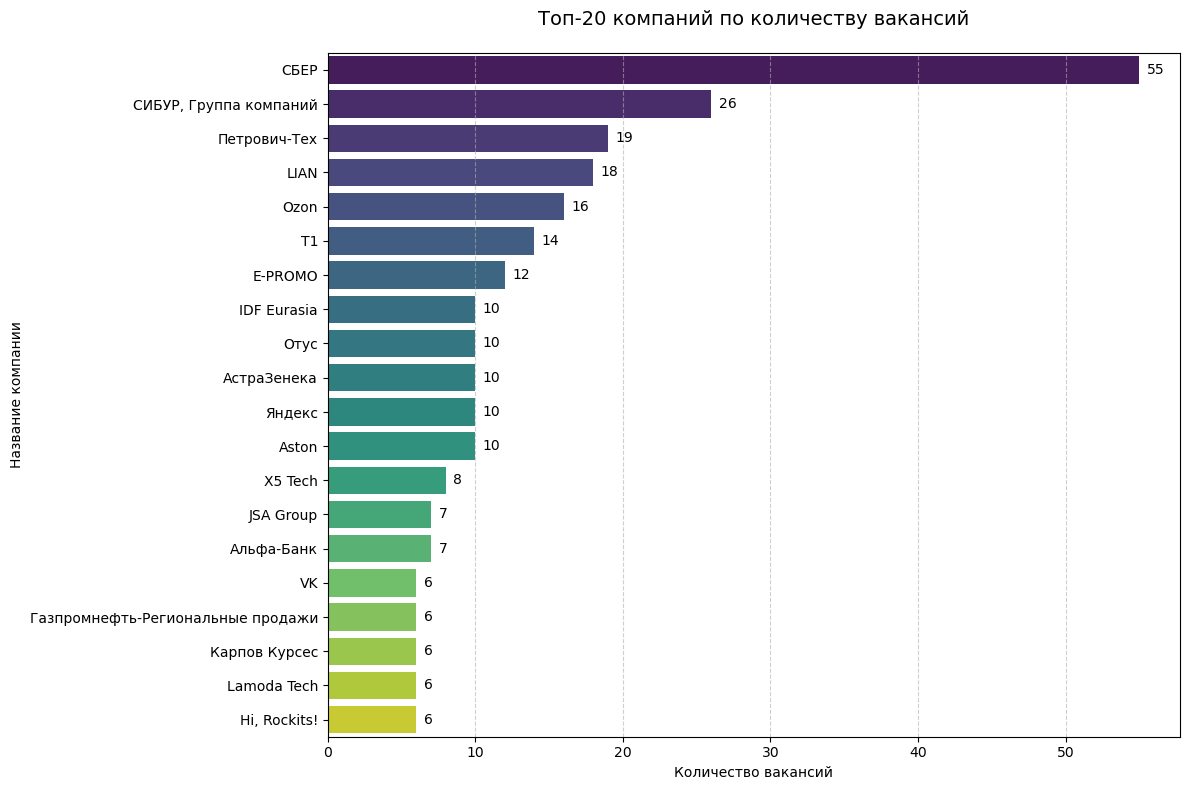

In [41]:
plt.figure(figsize=(12, 8))

top_companies = data['Компания'].value_counts().head(20)

ax = sns.barplot(x=top_companies.values, y=top_companies.index, palette='viridis')

for i, v in enumerate(top_companies.values):
    ax.text(v + 0.5, i, str(v), color='black', ha='left', va='center')

plt.title('Топ-20 компаний по количеству вакансий', pad=20, fontsize=14)
plt.xlabel('Количество вакансий')
plt.ylabel('Название компании')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

### **Опыт**

1. **Распределение вакансий по опыту работы**  
   Исходные данные содержат вакансии с различными требованиями к опыту: от "без опыта" до "более 6 лет". На первом этапе мы проанализируем общее распределение, а затем сосредоточимся на **вакансиях для начинающих специалистов**:  
   - "без опыта" 
   - "от 1 года до 3 лет"


2. **Фильтрация данных**  
   После анализа исключим вакансии, требующие значительного опыта (от 3 лет), чтобы изучить возможности для новичков в Data Science.


Опыт
От 1 года до 3 лет    481
От 3 до 6 лет         402
Нет опыта             120
Более 6 лет            96
Name: count, dtype: int64

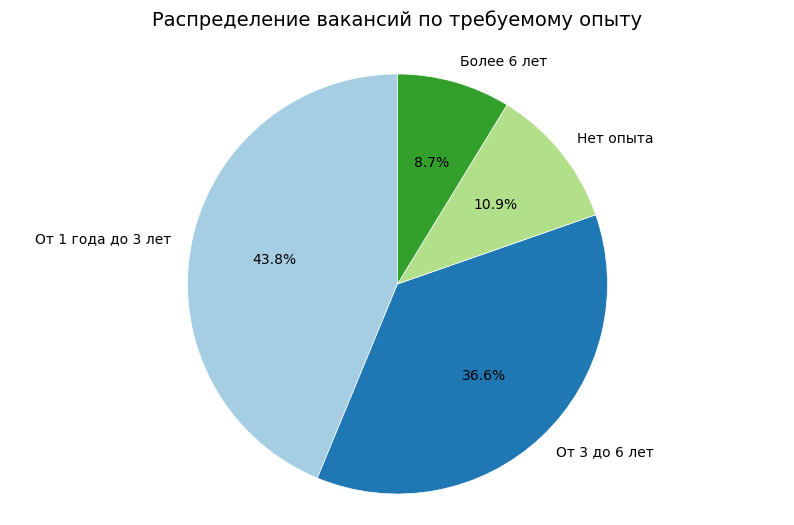

In [44]:
experience_counts = data['Опыт'].value_counts()
display(experience_counts)

plt.figure(figsize=(10, 6))
plt.pie(experience_counts, 
        labels=experience_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Paired.colors,
        wedgeprops={'edgecolor': 'white', 'linewidth': 0.5})
plt.title('Распределение вакансий по требуемому опыту', pad=20, fontsize=14)
plt.axis('equal')  
plt.show()

In [46]:
# Создаем датасет для junior-уровня
data_junior = data[data['Опыт'].isin(['Нет опыта', 'От 1 года до 3 лет'])]

print(f"Всего вакансий для junior: {len(data_junior)}")
print()
print(data_junior['Опыт'].value_counts())

Всего вакансий для junior: 601

Опыт
От 1 года до 3 лет    481
Нет опыта             120
Name: count, dtype: int64


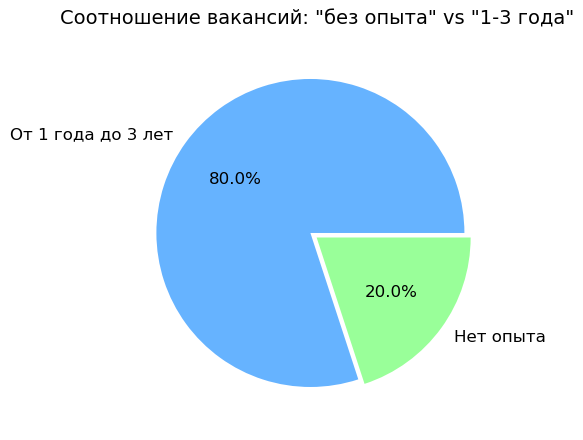

In [48]:
junior_counts = data_junior['Опыт'].value_counts()

plt.figure(figsize=(8, 5))
plt.pie(junior_counts,
        labels=junior_counts.index,
        autopct='%1.1f%%',
        explode=(0.05, 0),  
        colors=['#66b3ff', '#99ff99'],
        textprops={'fontsize': 12})
plt.title('Соотношение вакансий: "без опыта" vs "1-3 года"', pad=15, fontsize=14)
plt.show()

### **Зарплата и валюта**

In [51]:
data['Средняя_зарплата'] = (data['Зарплата_от'] + data['Зарплата_до']) / 2

In [53]:
data_junior['Средняя_зарплата'] = (data_junior['Зарплата_от'] + data_junior['Зарплата_до']) / 2

C:\Users\Евгений\AppData\Local\Temp\ipykernel_984\214481730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_junior['Средняя_зарплата'] = (data_junior['Зарплата_от'] + data_junior['Зарплата_до']) / 2


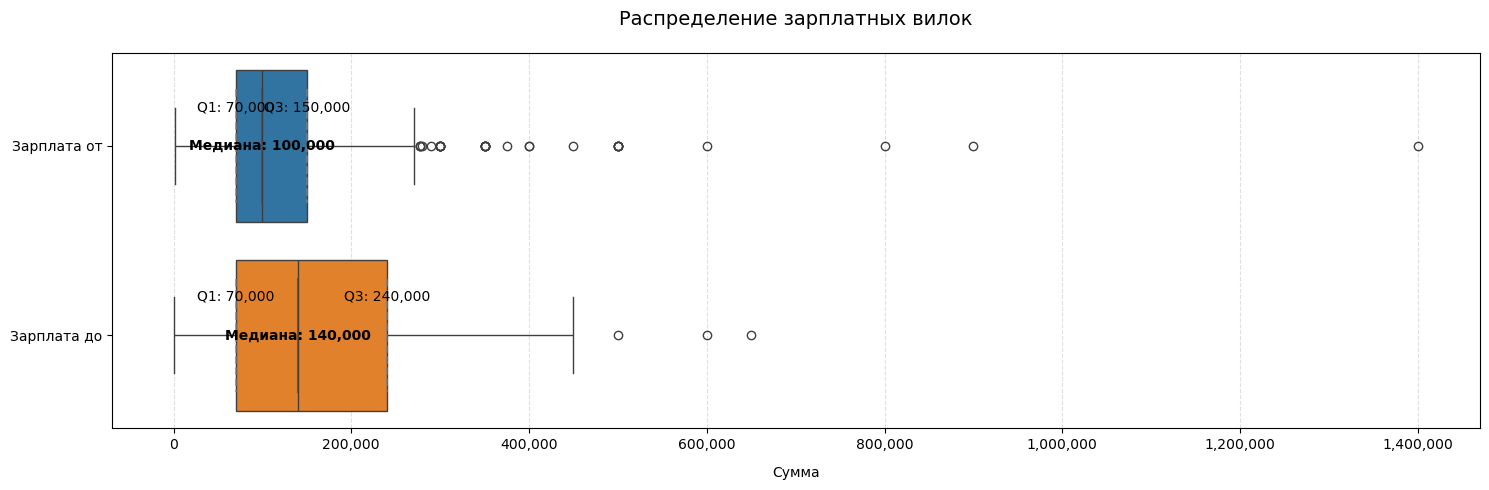

In [55]:
plt.figure(figsize=(15, 5))
ax = sns.boxplot(data=data[['Зарплата_от', 'Зарплата_до']], orient='h')

for i, col in enumerate(['Зарплата_от', 'Зарплата_до']):
    stats = data[col].describe()
    q1, med, q3 = stats[['25%', '50%', '75%']]
    
    ax.text(q1, i-0.2, f'Q1: {int(q1):,}', va='center', ha='center')
    ax.text(med, i, f'Медиана: {int(med):,}', va='center', ha='center', fontweight='bold')
    ax.text(q3, i-0.2, f'Q3: {int(q3):,}', va='center', ha='center')
    
    ax.plot([q1, q1], [i-0.3, i+0.3], color='gray', linestyle='--', alpha=0.7)
    ax.plot([med, med], [i-0.3, i+0.3], color='red', linestyle='-', alpha=0.7)
    ax.plot([q3, q3], [i-0.3, i+0.3], color='gray', linestyle='--', alpha=0.7)

plt.title('Распределение зарплатных вилок', pad=20, fontsize=14)
plt.yticks([0, 1], ['Зарплата от', 'Зарплата до'])
plt.xlabel('Сумма', labelpad=10)
plt.grid(axis='x', linestyle='--', alpha=0.4)

ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()

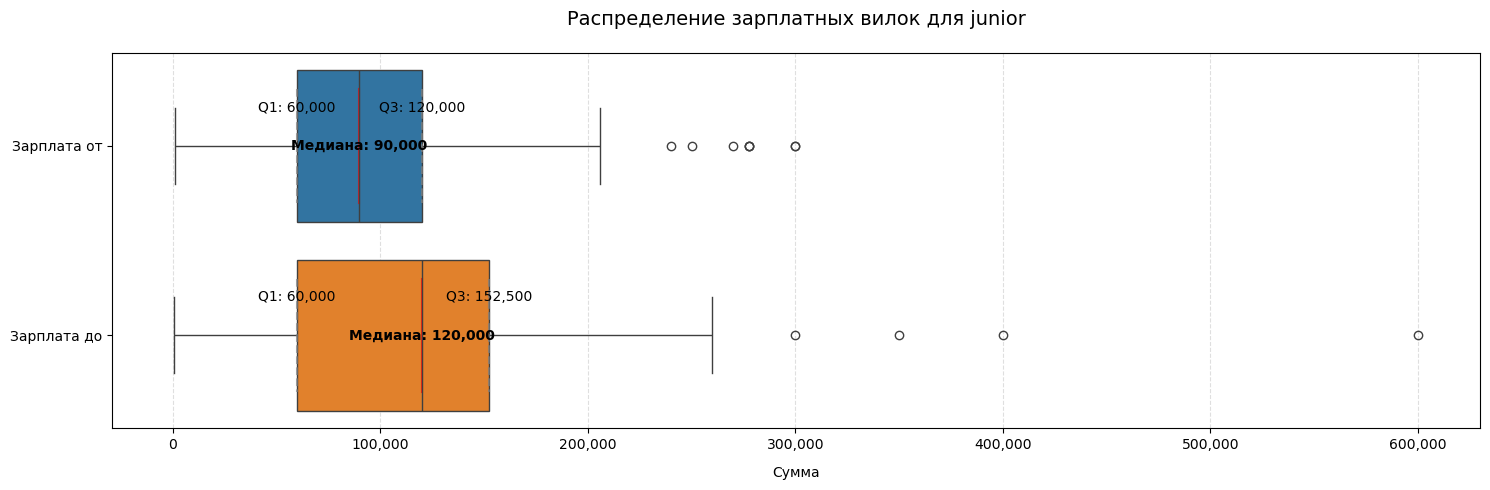

In [57]:
data_junior

plt.figure(figsize=(15, 5))
ax = sns.boxplot(data=data_junior[['Зарплата_от', 'Зарплата_до']], orient='h')

for i, col in enumerate(['Зарплата_от', 'Зарплата_до']):
    stats = data_junior[col].describe()
    q1, med, q3 = stats[['25%', '50%', '75%']]
    
    ax.text(q1, i-0.2, f'Q1: {int(q1):,}', va='center', ha='center')
    ax.text(med, i, f'Медиана: {int(med):,}', va='center', ha='center', fontweight='bold')
    ax.text(q3, i-0.2, f'Q3: {int(q3):,}', va='center', ha='center')
    
    ax.plot([q1, q1], [i-0.3, i+0.3], color='gray', linestyle='--', alpha=0.7)
    ax.plot([med, med], [i-0.3, i+0.3], color='red', linestyle='-', alpha=0.7)
    ax.plot([q3, q3], [i-0.3, i+0.3], color='gray', linestyle='--', alpha=0.7)

plt.title('Распределение зарплатных вилок для junior', pad=20, fontsize=14)
plt.yticks([0, 1], ['Зарплата от', 'Зарплата до'])
plt.xlabel('Сумма', labelpad=10)
plt.grid(axis='x', linestyle='--', alpha=0.4)

ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()

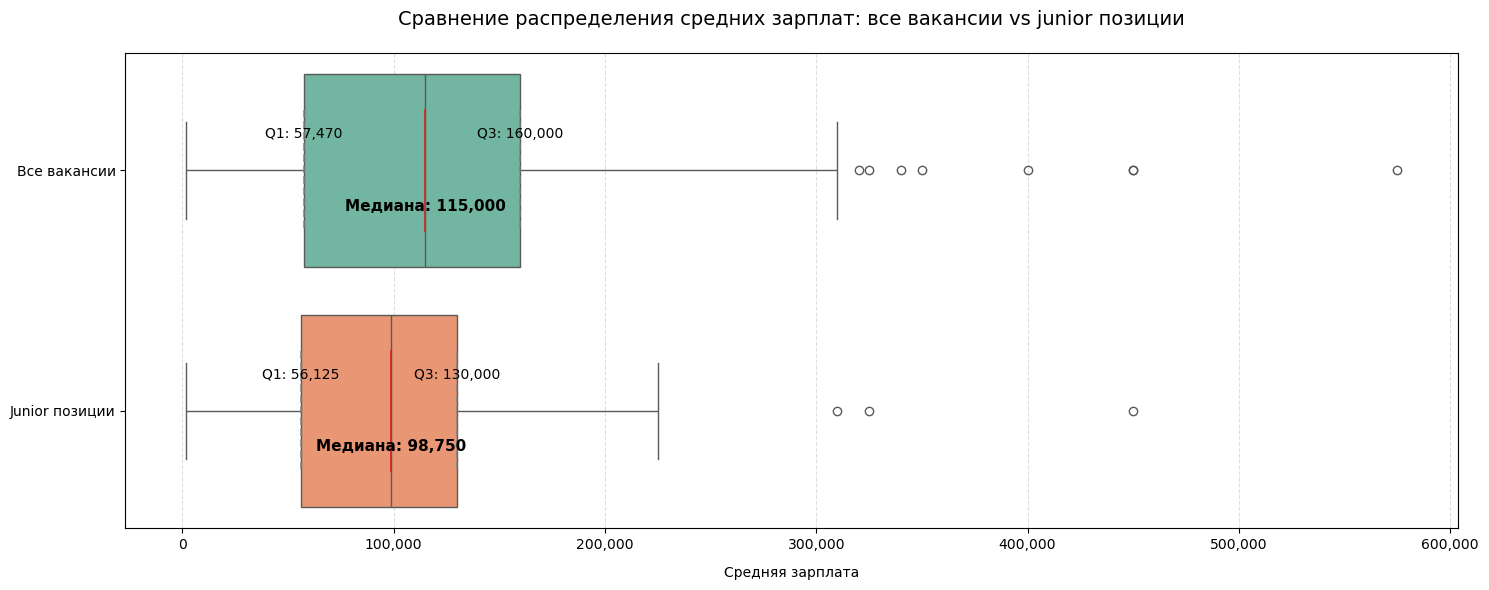

In [59]:
plt.figure(figsize=(15, 6))

combined_data = pd.DataFrame({
    'Все вакансии': data['Средняя_зарплата'],
    'Junior позиции': data_junior['Средняя_зарплата']
})

ax = sns.boxplot(data=combined_data, orient='h', palette='Set2')

for i, col in enumerate(combined_data.columns):
    stats = combined_data[col].describe()
    q1, med, q3 = stats[['25%', '50%', '75%']]
    
    ax.text(q1, i-0.15, f'Q1: {int(q1):,}', va='center', ha='center', fontsize=10)
    ax.text(med, i+0.15, f'Медиана: {int(med):,}', va='center', ha='center', 
            fontweight='bold', fontsize=11)
    ax.text(q3, i-0.15, f'Q3: {int(q3):,}', va='center', ha='center', fontsize=10)
    
    ax.plot([q1, q1], [i-0.25, i+0.25], color='gray', linestyle='--', alpha=0.7)
    ax.plot([med, med], [i-0.25, i+0.25], color='red', linestyle='-', alpha=0.7)
    ax.plot([q3, q3], [i-0.25, i+0.25], color='gray', linestyle='--', alpha=0.7)

plt.title('Сравнение распределения средних зарплат: все вакансии vs junior позиции', 
          pad=20, fontsize=14)
plt.xlabel('Средняя зарплата', labelpad=10)
plt.grid(axis='x', linestyle='--', alpha=0.4)

ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()

In [66]:
data_junior

,Название,Компания,Зарплата_от,Зарплата_до,Валюта,Город,Опыт,Тип_занятости,Дата_публикации,Ссылка,Ключевые_навыки,Описание,Запрос,Средняя_зарплата
1,Java developer (middle),JSA Group,NaN,NaN,NaN,Москва,От 1 года до 3 лет,Полная занятость,2025-03-31T11:29:58+0300,https://hh.ru/vacancy/118965013,"Java, Spring Security, Spring WebFlux, SQL, Sp...",<p><strong>JSA Group</strong> - аккредитованна...,data science,NaN
2,Аналитик данных,Петрович-Тех,NaN,NaN,NaN,Санкт-Петербург,От 1 года до 3 лет,Полная занятость,2025-03-31T08:49:56+0300,https://hh.ru/vacancy/118951697,NaN,<p><strong>«Петрович-Тех» </strong>строит и ра...,data science,NaN
4,Аналитик данных (проект Честный знак),Coleman Group,150000.0,NaN,RUR,Москва,От 1 года до 3 лет,Полная занятость,2025-03-31T13:11:48+0300,https://hh.ru/vacancy/118972548,NaN,<p>В аккредитованную ИТ компанию «Коулмэн Тех»...,data science,NaN
5,Аналитик данных,Youstars,150000.0,NaN,RUR,Москва,От 1 года до 3 лет,Полная занятость,2025-03-31T15:13:51+0300,https://hh.ru/vacancy/118980717,"SQL, Power BI, Python, Маркетинговые метрики, ...",<strong>О вакансии:</strong> <p>В отдел маркет...,data science,NaN
6,Frontend-разработчик Vue.js,LIAN,NaN,260000.0,RUR,Москва,От 1 года до 3 лет,Полная занятость,2025-03-18T11:06:20+0300,https://hh.ru/vacancy/118492380,"Git, JavaScript, CSS, SCSS, Vuex, HTML5, Vue.j...",<p><strong>LIAN — системный интегратор с фокус...,data science,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,Senior Machine Learning Engineer (RL/Reinforce...,СБЕР,NaN,NaN,NaN,Москва,От 1 года до 3 лет,Полная занятость,2025-03-27T17:01:00+0300,https://hh.ru/vacancy/118873055,NaN,<p>Мы команда Центра Робототехники Сбера. Прям...,machine learning engineer,NaN
1117,QA Automation Engineer (Java)/AI QA Engineer,Aston,NaN,NaN,NaN,Москва,От 1 года до 3 лет,Полная занятость,2025-03-10T11:56:24+0300,https://hh.ru/vacancy/118123714,NaN,<p><strong>Мы – аутсорсинговая IT-компания Ast...,machine learning engineer,NaN
1121,Assistant Professor - Data Science&AI (english),Университет Иннополис,NaN,NaN,NaN,Москва,От 1 года до 3 лет,Полная занятость,2025-03-15T16:28:17+0300,https://hh.ru/vacancy/81857296,"Information Technology, Fluent English, Resear...",<p>The Faculty of Computer Science and Enginee...,machine learning engineer,NaN
1123,Engineering & Manufacturing Intern / Стажер пр...,Procter&Gamble - Новомосковск,100000.0,NaN,RUR,Томск,Нет опыта,Полная занятость,2025-03-31T09:32:41+0300,https://hh.ru/vacancy/107465989,NaN,<p><strong>НАЙМ НА СРОЧНЫЙ ТРУДОВОЙ ДОГОВОР в ...,machine learning engineer,NaN


In [70]:
company_stats = data_junior.groupby('Компания')['Средняя_зарплата'].agg(
    ['count', 'mean', 'median', 'std', 'min', 'max']
).sort_values('mean', ascending=False)

company_stats

,count,mean,median,std,min,max
Компания,,,,,,
OpenHiring,1,450000.0,450000.0,NaN,450000.0,450000.0
AYA GAMES,1,325000.0,325000.0,NaN,325000.0,325000.0
Желдорреммаш,1,310000.0,310000.0,NaN,310000.0,310000.0
ГК SUPERГАЗ,1,225000.0,225000.0,NaN,225000.0,225000.0
Metaratings,1,215000.0,215000.0,NaN,215000.0,215000.0
...,...,...,...,...,...,...
Эмбедика,0,NaN,NaN,NaN,NaN,NaN
"ЮТэйр, Авиакомпания",0,NaN,NaN,NaN,NaN,NaN
Яндекс,0,NaN,NaN,NaN,NaN,NaN


<Figure size 1200x600 with 0 Axes>

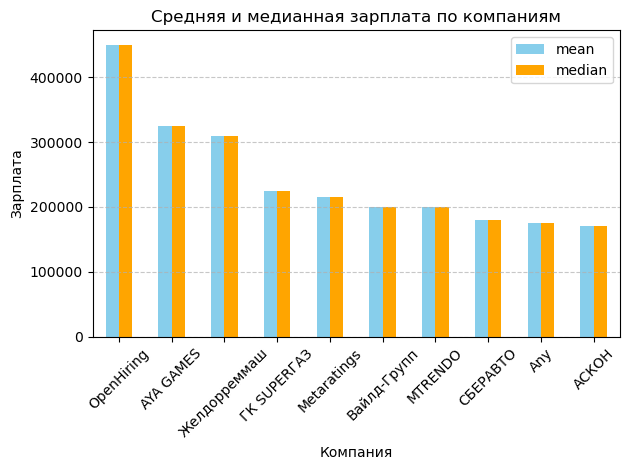

In [72]:
plt.figure(figsize=(12, 6))
company_stats_sorted = company_stats.sort_values('mean', ascending=False).head(10)  # Топ-10 компаний
company_stats_sorted[['mean', 'median']].plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Средняя и медианная зарплата по компаниям')
plt.ylabel('Зарплата')
plt.xlabel('Компания')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

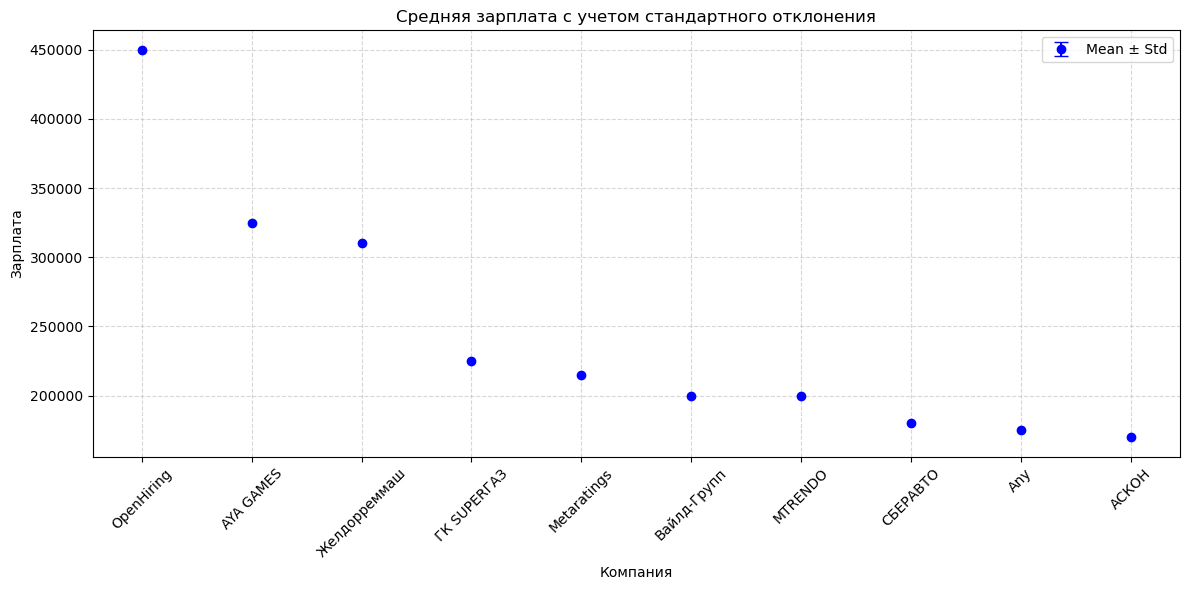

In [74]:
plt.figure(figsize=(12, 6))
plt.errorbar(
    x=company_stats_sorted.index,
    y=company_stats_sorted['mean'],
    yerr=company_stats_sorted['std'],
    fmt='o',
    capsize=5,
    color='blue',
    label='Mean ± Std'
)
plt.title('Средняя зарплата с учетом стандартного отклонения')
plt.ylabel('Зарплата')
plt.xlabel('Компания')
plt.xticks(rotation=45)
plt.legend()
plt.grid(linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

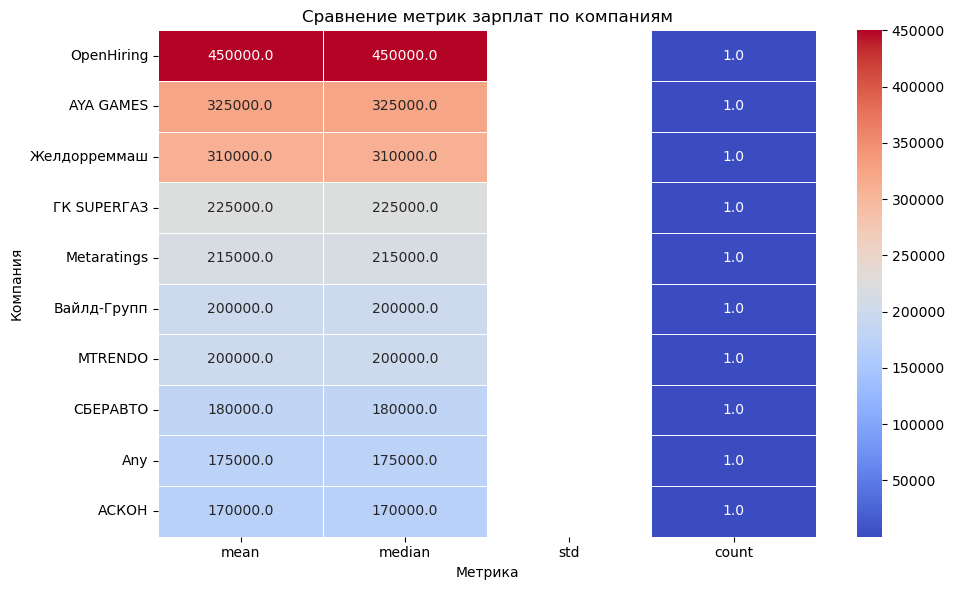

In [76]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    company_stats_sorted[['mean', 'median', 'std', 'count']],
    annot=True,
    fmt='.1f',
    cmap='coolwarm',
    linewidths=0.5
)
plt.title('Сравнение метрик зарплат по компаниям')
plt.xlabel('Метрика')
plt.ylabel('Компания')
plt.tight_layout()
plt.show()

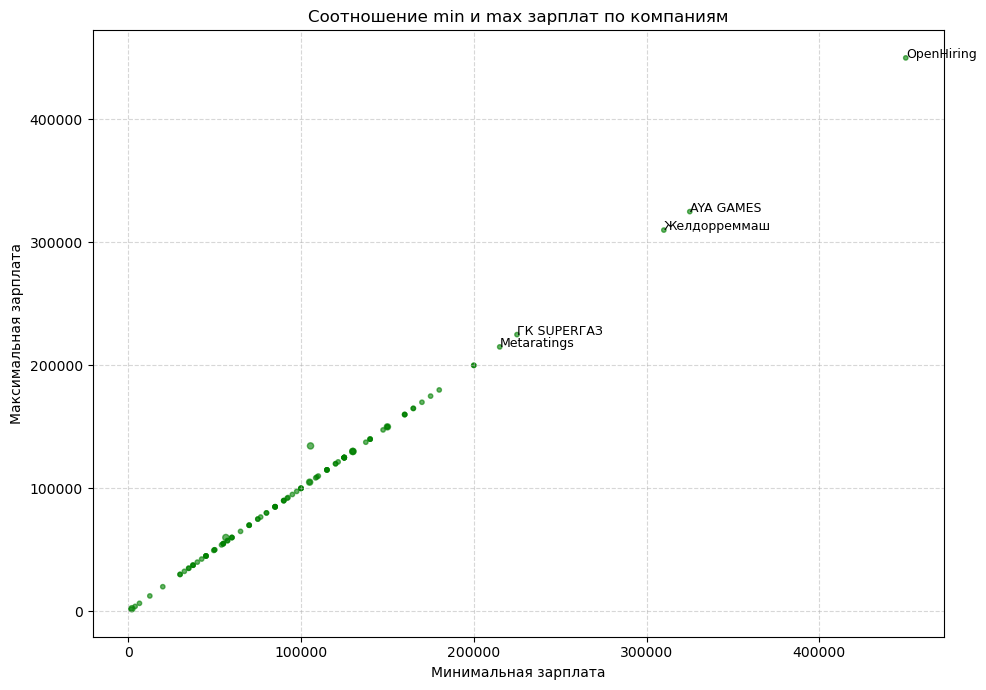

In [90]:
plt.figure(figsize=(10, 7))
plt.scatter(
    company_stats['min'],
    company_stats['max'],
    s=company_stats['count'] * 10,  # Размер точки зависит от количества наблюдений
    alpha=0.6,
    color='green'
)
plt.title('Соотношение min и max зарплат по компаниям')
plt.xlabel('Минимальная зарплата')
plt.ylabel('Максимальная зарплата')
plt.grid(linestyle='--', alpha=0.5)
for company in company_stats.head(5).index:  # Подписать топ-5 компаний
    plt.text(
        company_stats.loc[company, 'min'],
        company_stats.loc[company, 'max'],
        company,
        fontsize=9
    )
plt.tight_layout()
plt.show()

### **Город**

**Вывод по разделу разведочного анализа (EDA):**

1. **Разнообразие вакансий:**
   - Широкий спектр специализаций (850 уникальных должностей)
   - Очистка данных: удалены 28 вакансий "Системный аналитик" как нерелевантные

2. **Распределение по компаниям:**

   | Компания       | Вакансий | Доля |
   |---------------|----------|------|
   | Сбер          | 55       | 5.0% |
   | СИБУР         | 26       | 2.4% |
   | Петрович-Тех  | 19       | 1.7% |
   ```
   - Топ-5 компаний = 18% вакансий
   - Сбер - абсолютный лидер (5% рынка)

3. **Опыт работы:**

   | Опыт          | Вакансий | Доля  |
   |---------------|----------|-------|
   | 1-3 года      | 481      | 43.8% |
   | 3-6 лет       | 402      | 36.6% |
   | Нет опыта     | 120      | 10.9% |

   - 80.4% вакансий для Mid-level (1-6 лет)
   - Junior-позиции (без опыта + 1-3 года) = 54.7%

4. **Зарплаты:**

   | Метрика       | Все    | Junior |
   |--------------|--------|--------|
   | Q1      | 57k   | 56k  |
   | Медиана      | 115k   | 98.8k  |
   | Q3           | 160k   | 130k   |

   - Незначительная разница медиан
   - Преобладание Junior/Middle искажает картину

6. **География:**
   - Москва доминирует (377 вакансий)
   - Топ-20 городов охватывает 85% вакансий

**Ключевые инсайты:**
- Рынок ориентирован на специалистов с 1-6 годами опыта
- Зарплатные ожидания Junior близки к общему уровню
- Высокая концентрация вакансий в Москве и у крупных работодателей


### **Город**

Исследование ключевых навыков, указанных в вакансиях, для выявления наиболее востребованных компетенций и их взаимосвязей.  

**Шаги обработки данных:**

1. **Формирование отдельного датафрейма**  
   - В новый датафрейм включим:  
     - Название компании (`Компания`)  
     - Должность (`Должность`)  
     - Список навыков (`Навыки`)  

2. **Очистка данных**  
   - Удалим строки с пропусками (`NaN`) и пустыми значениями в столбце `Навыки`.  
   - Приведем навыки к единому формату (например, удалим лишние пробелы и приведем к нижнему регистру).  

3. **Кодирование навыков**  
   - Преобразуем текстовые навыки в бинарную матрицу (One-Hot Encoding), где:  
     - Каждый столбец соответствует отдельному навыку.  
     - Значение `1` означает наличие навыка у вакансии, `0` — отсутствие.  

4. **Визуализация**  
   - Построим **топ-N самых популярных навыков** (столбчатая диаграмма).  
   - Проанализируем **корреляцию между навыками** (тепловая карта).  

In [38]:
data_skill = data[['Название', 'Компания', 'Ключевые_навыки']].copy()

# Удаляем NaN и разделяем навыки
data_skill = data_skill.dropna(how='all')
split_skills = data_skill['Ключевые_навыки'].str.split(',\s*', expand=True)

# Переименовываем столбцы с навыками
split_skills.columns = [f'Навык_{i+1}' for i in range(split_skills.shape[1])]

# Объединяем с исходными данными
data_skill = pd.concat([data_skill[['Название', 'Компания']], split_skills], axis=1)

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Евгений\AppData\Local\Temp\ipykernel_20812\34854348.py:5: SyntaxWarning: invalid escape sequence '\s'
  split_skills = data_skill['Ключевые_навыки'].str.split(',\s*', expand=True)


In [39]:
display(data_skill.head())

,Название,Компания,Навык_1,Навык_2,Навык_3,Навык_4,Навык_5,Навык_6,Навык_7,Навык_8,...,Навык_21,Навык_22,Навык_23,Навык_24,Навык_25,Навык_26,Навык_27,Навык_28,Навык_29,Навык_30
0,Frontend-разработчик,АстраЗенека,React,VueJS,HTML,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Java developer (middle),JSA Group,Java,Spring Security,Spring WebFlux,SQL,Spring Cloud,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Аналитик данных,Петрович-Тех,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Директор департамента закупочной деятельности,Российское общество Знание,Управление закупками,Управление бизнес процессами,Стратегическое мышление,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Аналитик данных (проект Честный знак),Coleman Group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\Евгений\AppData\Local\Temp\ipykernel_20812\1493888326.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skill_counts.values, y=skill_counts.index, palette="viridis")


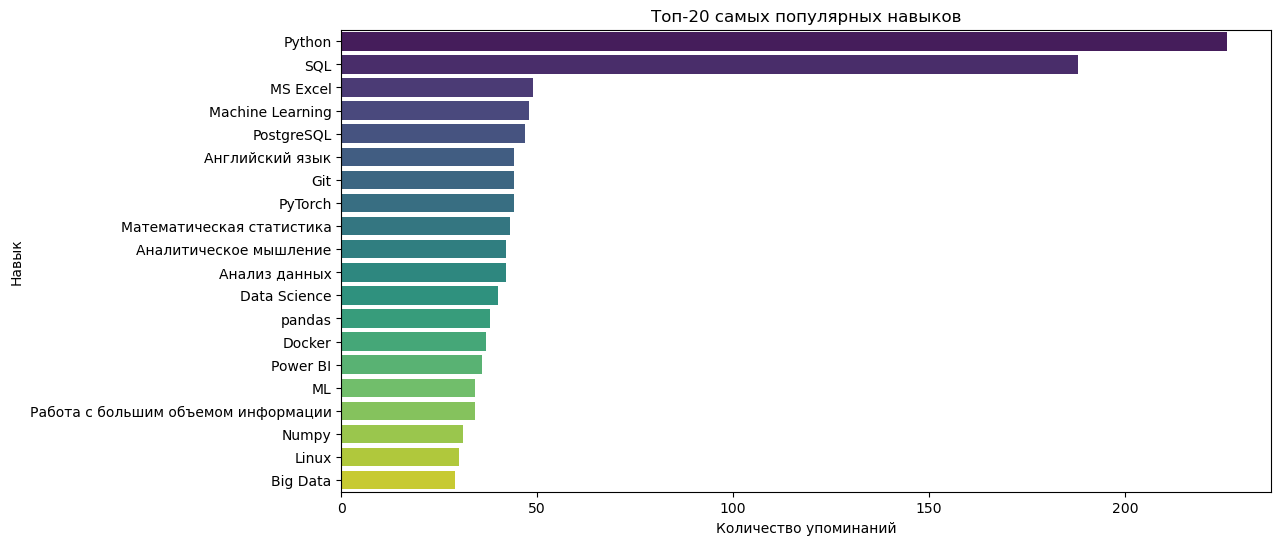

In [40]:
# Собираем все навыки в один список (игнорируем NaN)
all_skills = []
for col in data_skill.columns:
    if col.startswith('Навык_'):
        skills = data_skill[col].dropna()
        all_skills.extend(skills)

# Считаем частоту навыков
skill_counts = pd.Series(all_skills).value_counts().head(20)

# Строим график
plt.figure(figsize=(12, 6))
sns.barplot(x=skill_counts.values, y=skill_counts.index, palette="viridis")
plt.title('Топ-20 самых популярных навыков')
plt.xlabel('Количество упоминаний')
plt.ylabel('Навык')
plt.show()

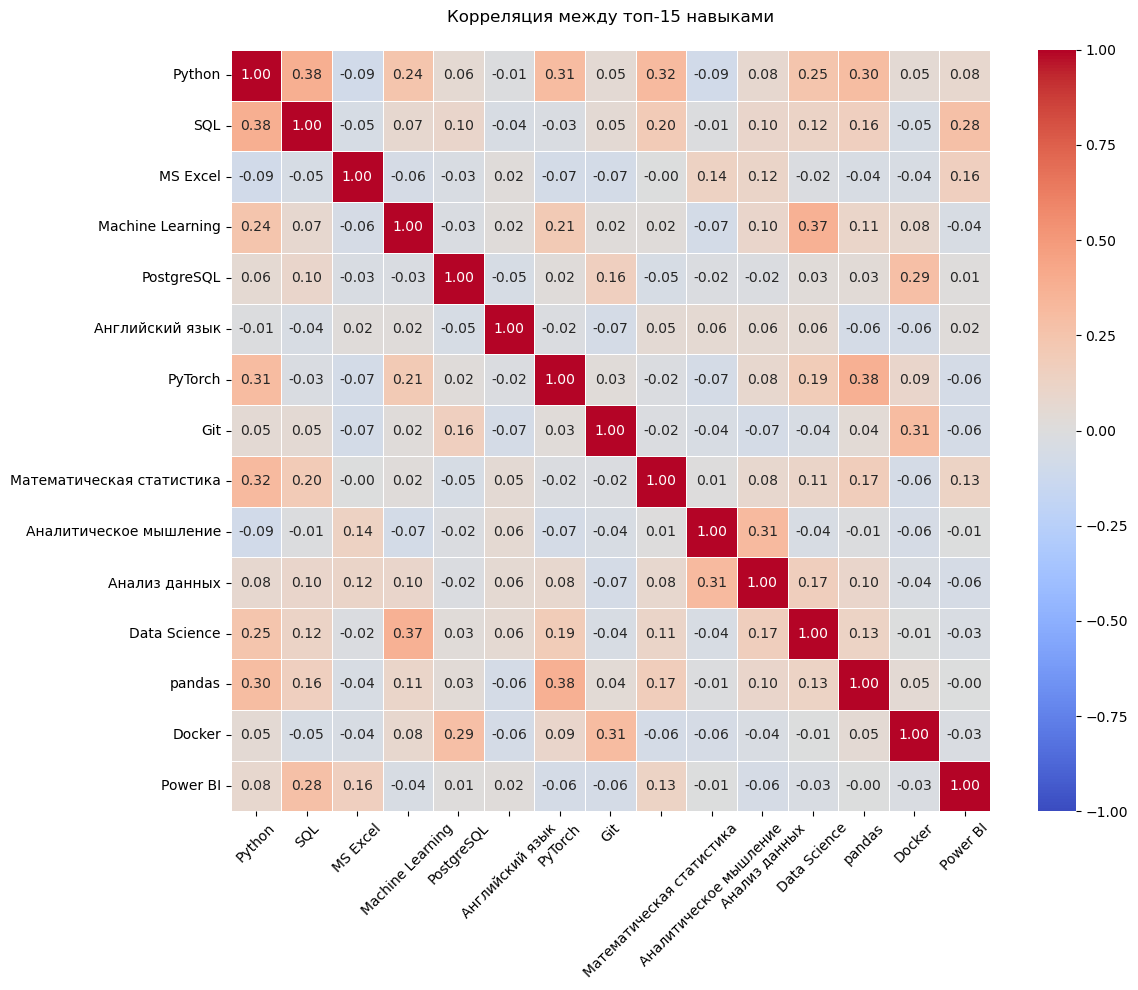

In [41]:
# 1. Создаем бинарную матрицу навыков (One-Hot Encoding)
skills_stacked = data_skill.filter(like='Навык_').stack()  # "Распаковываем" навыки в один столбец
skills_encoded = pd.get_dummies(skills_stacked)  # One-Hot Encoding
skills_encoded = skills_encoded.groupby(level=0).sum()  # Суммируем по вакансиям (если навыки повторяются)

# 2. Выбираем топ-15 навыков для визуализации
top_skills = skills_encoded.sum().sort_values(ascending=False).head(15).index
skills_encoded_top = skills_encoded[top_skills]

# 3. Считаем корреляцию
corr_matrix = skills_encoded_top.corr()

# 4. Рисуем тепловую карту
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    linewidths=0.5,
    vmin=-1, 
    vmax=1,  # Фиксируем диапазон для лучшей интерпретации
)
plt.title('Корреляция между топ-15 навыками', pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Вывод по анализу столбца "Навыки"**  

**1. Ключевые навыки**

В датасете было выделено **30 ключевых навыков**, среди которых наиболее популярными оказались:

- **Технические навыки**:  
  - `Python` (лидер по частоте упоминаний),  
  - `SQL`,  
  - `Git`,  
  - `Docker`,  
  - `PyTorch`,  
  - `Pandas`.  
- **Аналитика и Data Science**:  
  - `Машинное обучение (ML)`,  
  - `Анализ данных`,  
  - `Data Science (DS)`,  
  - `Математическая статистика`.  
- **Инструменты визуализации и BI**:  
  - `Power BI`,  
  - `MS Excel`.  
- **Soft Skills**:  
  - `Английский язык`,  
  - `Аналитическое мышление`.  

**2. Корреляция навыков**

Анализ взаимосвязи **15 самых популярных навыков** показал следующие сильные корреляции:

- **`Python + SQL` (0.38)** — связь базового языка программирования и работы с базами данных.   
- **`Pandas + PyTorch` (0.38)** — использование библиотек для анализа данных и глубокого обучения.
- **`ML + DS` (0.37)** — ожидаемая зависимость между машинным обучением и Data Science.  
- **`Git + Docker` (0.31)** — совместное применение инструментов разработки и DevOps.  
- **`Pandas + Python` (0.30)** — популярная связь библиотеки анализа данных с языком Python.  

**3. Интерпретация результатов**

- **Технический стек**:  
  - Доминирование `Python` и связанных с ним навыков (`Pandas`, `PyTorch`) подтверждает его лидерство в аналитике и ML.  
  - Навыки работы с данными (`SQL`, `Power BI`) критически важны для аналитиков и инженеров данных.  
- **Разработка и DevOps**:  
  - Корреляция `Git` и `Docker` отражает требования к современным практикам CI/CD и контейнеризации.  
- **Soft Skills**:  
  - Включение `Английского языка` и `Аналитического мышления` подчеркивает важность не только технических, но и надпрофессиональных навыков.  


### **Описание вакансий**

Проведем разведочный анализ и предобработку текстовых данных из столбца **"Описание"**, чтобы подготовить их для классификации или кластеризации вакансий. Поскольку данные не размечены, основная задача — выявить паттерны, ключевые слова и возможные тематические группы вакансий с помощью методов NLP и машинного обучения.

---

Изначально проведем **выделение данных** и в отдельном блокноте проведу дальшейший **разведочный анализ** и **обучение модели**.

In [100]:
data_description = data[["Описание"]].copy()
data_description.head()

,Описание
0,<p>Компания «АстраЗенека» верит в потенциал св...
1,<p><strong>JSA Group</strong> - аккредитованна...
2,<p><strong>«Петрович-Тех» </strong>строит и ра...
3,<p><strong>Российское общество «Знание»</stron...
4,<p>В аккредитованную ИТ компанию «Коулмэн Тех»...


**Вывод по анализу столбца "Вакансии"**  

В ходе исследования был проведен комплексный анализ вакансий с использованием методов NLP и машинного обучения. Основные этапы и ключевые выводы:  

**1. Предобработка текста**  
- Текст вакансий был очищен от HTML-тегов, спецсимволов, цифр и приведен к нижнему регистру.  
- Проведена токенизация, удаление стоп-слов и лемматизация для приведения слов к базовой форме.  
- **Вывод:** Текст успешно подготовлен для дальнейшего анализа, что позволило улучшить качество последующих этапов.  

**2. TF-IDF векторизация**  
- Метод TF-IDF выделил наиболее значимые термины в вакансиях.  
- **Топ-5 ключевых слов:**  
  - "опыт" (88.12)  
  - "данных" (72.60)  
  - "работы" (68.45)  
  - "знание" (65.30)  
  - "умение" (59.20)  
- **Вывод:** Работодатели чаще всего требуют опыт работы, навыки анализа данных и soft skills ("умение", "понимание").  

**3. Кластеризация методом K-Means**  
- Оптимальное число кластеров — **5** (определено по методу локтя).  
- Распределение кластеров:  
  - **Кластер 4 (480 вакансий)** — массовые IT-позиции (общие требования).  
  - **Кластер 3 (276)** — разработка ПО.  
  - **Кластер 1 (223)** — продвинутая аналитика (Python, модели).  
  - **Кластер 2 (71)** — международные проекты (англоязычные термины).  
  - **Кластер 0 (37)** — Data Science / AI (узкоспециализированные роли).  
- **Вывод:** Рынок вакансий четко структурирован, но наблюдается диспропорция — большинство вакансий относятся к общим IT-ролям.  

**4. Анализ кластеров (ключевые слова)**  
- **Кластер 0 (Data Science):** "машинного", "science", "обучения" → требует углубленных знаний в ML.  
- **Кластер 1 (Аналитика):** "python", "моделей", "разработки" → технические навыки в приоритете.  
- **Кластер 2 (Международные проекты):** "team", "experience", "work" → важен английский язык.  
- **Кластер 3 (Разработка ПО):** "понимание", "навыки", "разработки" → баланс hard/soft skills.  
- **Кластер 4 (Общие IT):** "опыт", "работы", "компании" → массовые требования.  
- **Вывод:** Разные кластеры требуют разных подходов в подборе персонала и составлении резюме.  

**5. BERT-эмбеддинги**  
- BERT использовался для получения контекстно-зависимых векторных представлений текста.  
- **Вывод:** В отличие от TF-IDF, BERT лучше учитывает семантику, что полезно для более глубокого анализа тональности или сложных зависимостей.  

**Итоговые рекомендации**  
✅ **Для HR-специалистов:**  
- Разные кластеры требуют разных стратегий поиска кандидатов (например, Kaggle/GitHub для Data Science, LinkedIn — для международных проектов).  
- В массовых вакансиях (Кластер 4) важны soft skills, в узкоспециализированных (Кластер 0-1) — технические навыки.  

✅ **Для соискателей:**  
- **Data Science / AI:** делать упор на ML, нейросети, научные публикации.  
- **Аналитика:** Python, SQL, работа с моделями.  
- **Международные проекты:** английский язык, опыт работы в распределенных командах.  

✅ **Для дальнейшего анализа:**  
- Исследовать динамику изменения кластеров (например, рост спроса на AI).  
- Добавить анализ n-грамм (словосочетаний) для более точной интерпретации.  
- Использовать BERT для тематического моделирования.  

**Заключение**  
Проведенный анализ позволил выявить **5 ключевых сегментов вакансий**, определить **наиболее востребованные навыки** и дать **практические рекомендации** для HR и соискателей. Методы NLP (TF-IDF, K-Means) и BERT показали свою эффективность, но для более глубокого понимания контекста стоит комбинировать их с другими подходами (например, Word2Vec или тематическим моделированием).